In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from splinter import Browser
import matplotlib.pyplot as plt
import html5lib

In [11]:
ca_df = pd.read_csv("data/QuickStatisticsResultsCBHSQDataSAMHSA.csv")
ca_df

,State: CA,All Substances,Alcohol Only,Alcohol with secondary drug,Heroin,Other opiates,Cocaine (smoked),Cocaine (other route),Marijuana,Amphetamines,Other stimulants,Tranquilizers,Sedatives,Hallucinogens,PCP,Inhalants,Other/Unknown
0,Total (Number),"156,180","19,020","15,996","39,307","7,447","2,590","1,906","16,117","50,303",73,552,397,72,412,67,"1,921"
1,Total,100.0,12.2,10.2,25.2,4.8,1.7,1.2,10.3,32.2,0.0,0.4,0.3,0.0,0.3,0.0,1.2
2,Gender,All Substances,Alcohol Only,Alcohol with secondary drug,Heroin,Other opiates,Cocaine (smoked),Cocaine (other route),Marijuana,Amphetamines,Other stimulants,Tranquilizers,Sedatives,Hallucinogens,PCP,Inhalants,Other/Unknown
3,Male,61.5,62.2,62.9,65.6,51.5,63.1,69.0,67.4,57.3,58.9,60.1,60.7,66.7,51.5,53.7,53.9
4,Female,38.3,37.6,36.9,34.3,48.4,36.8,30.9,32.5,42.4,41.1,39.7,39.3,33.3,48.5,46.3,45.5
5,Unknown,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.6
6,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,Age,All Substances,Alcohol Only,Alcohol with secondary drug,Heroin,Other opiates,Cocaine (smoked),Cocaine (other route),Marijuana,Amphetamines,Other stimulants,Tranquilizers,Sedatives,Hallucinogens,PCP,Inhalants,Other/Unknown
8,12-17 years,5.0,1.0,2.5,0.1,0.4,0.2,3.5,41.3,0.6,9.6,9.2,11.3,15.3,10.4,13.4,2.7
9,18-20 years,2.4,0.8,1.8,1.1,2.4,0.7,6.1,8.1,2.1,5.5,17.8,11.1,12.5,3.4,9.0,3.6


In [3]:
# Extract the alcohol column only
ca_alcohol_df = ca_df.iloc[:,[0,2]]
ca_alcohol_df

,State: CA,Alcohol Only
0,Total (Number),"19,020"
1,Total,12.2
2,Gender,Alcohol Only
3,Male,62.2
4,Female,37.6
5,Unknown,0.2
6,Total,100.0
7,Age,Alcohol Only
8,12-17 years,1.0
9,18-20 years,0.8


In [12]:
# extract gender
gender = ca_alcohol_df.iloc[3:6,]
gender_df = pd.DataFrame(gender)
print(gender_df.columns)


Index(['State: CA', 'Alcohol Only'], dtype='object')


In [13]:
gender_df = gender_df.rename(columns={"State: CA":'Gender', 'Alcohol Only':'Percent'})
gender_df = gender_df.reset_index(drop=True)
print(gender_df)

    Gender Percent
0     Male    62.2
1   Female    37.6
2  Unknown     0.2


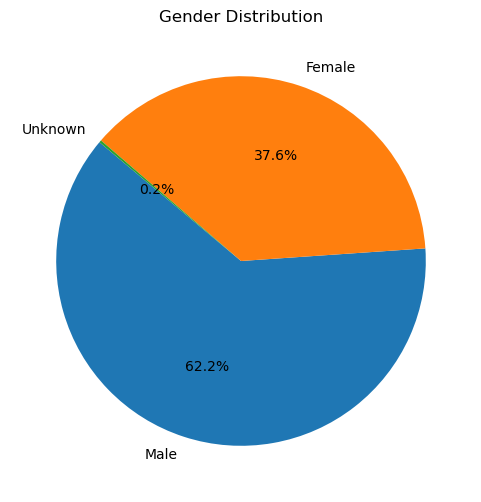

In [17]:
# Gender pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_df["Percent"], labels=gender_df["Gender"], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [30]:
# Age
age_df = ca_alcohol_df.iloc[8:20,]
age_df = age_df.rename(columns={"State: CA":'Age group', 'Alcohol Only':'Percent'})
age_df = age_df.reset_index(drop=True)
age_df

,Age group,Percent
0,12-17 years,1.0
1,18-20 years,0.8
2,21-25 years,5.0
3,26-30 years,12.3
4,31-35 years,13.9
5,36-40 years,13.8
6,41-45 years,10.9
7,46-50 years,11.9
8,51-55 years,11.7
9,56-60 years,10.4


In [31]:
age_df['Age group'] = age_df['Age group'].str.replace(' years', '')
age_df

,Age group,Percent
0,12-17,1.0
1,18-20,0.8
2,21-25,5.0
3,26-30,12.3
4,31-35,13.9
5,36-40,13.8
6,41-45,10.9
7,46-50,11.9
8,51-55,11.7
9,56-60,10.4


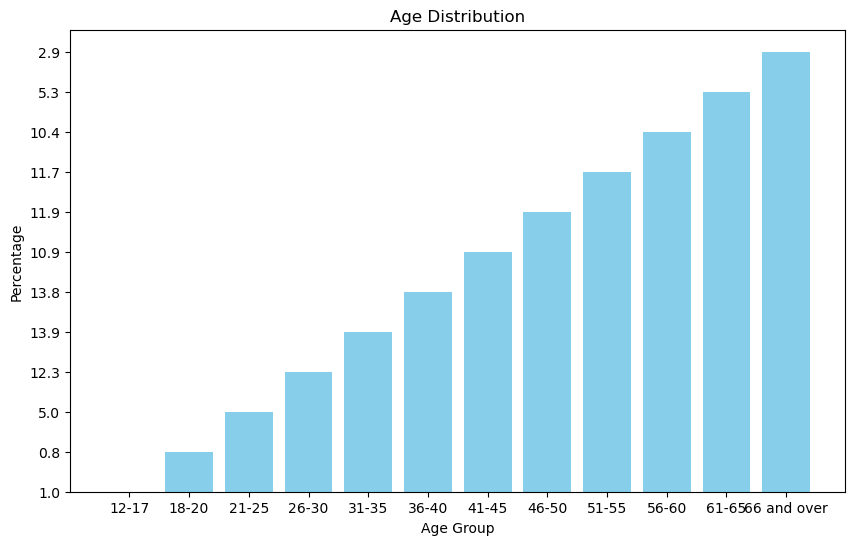

In [40]:
# age distribution
plt.figure(figsize=(10, 6))
plt.bar(age_df["Age group"], age_df["Percent"], color='skyblue')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.title('Age Distribution')
plt.show()

In [39]:
race_df = ca_alcohol_df.iloc[23:29,]
race_df = race_df.rename(columns={"State: CA":'Race', 'Alcohol Only':'Percent'})
race_df = race_df.reset_index(drop=True)
race_df

,Race,Percent
0,White,56.2
1,Black or African-American,10.2
2,American Indian or Alaska Native,1.6
3,Asian or Native Hawaiian or Other Pacific Isla...,2.7
4,Other,24.1
5,Unknown,5.1


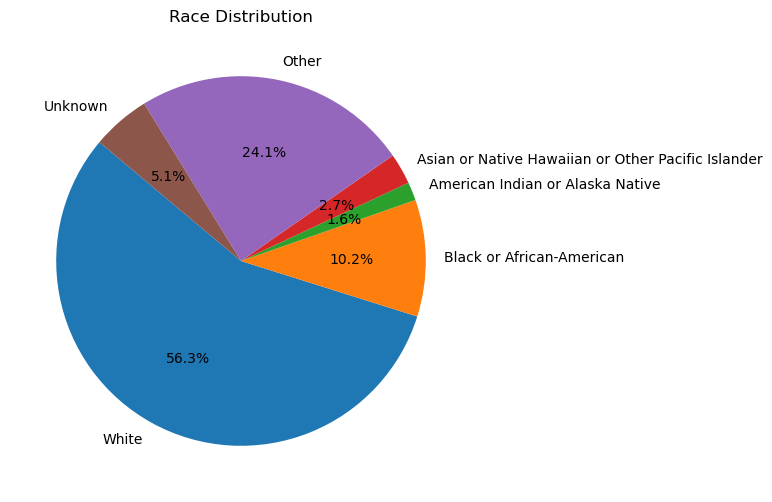

In [46]:
# Race pie chart 
plt.figure(figsize=(6, 6))
plt.pie(race_df["Percent"], labels=race_df["Race"], autopct='%1.1f%%', startangle=140)
plt.title('Race Distribution')
plt.show()